# IRIS Dataset  with K-MEANS Clustering 

# #Author:FARHANA HOQUE

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
# Load the Iris dataset
file_path = r'C:\Users\User\Downloads\Iris.csv'
df = pd.read_csv(file_path)

# Check if the dataset loaded correctly
print("Original DataFrame shape:", df.shape)
print(df.head())

Original DataFrame shape: (150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## Data Preprocessing - Dropping Non-Numeric Columns

In [3]:
# Drop the 'Species' column as it is non-numeric
iris_df = df.drop(columns=['Species'])

# Check the DataFrame after dropping the 'Species' column
print("DataFrame after dropping 'Species':")
print(iris_df.head())

DataFrame after dropping 'Species':
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


# #Convert Data to Numeric and Handle NaN Values

In [4]:
# Convert all data to numeric type (if necessary)
iris_df = iris_df.apply(pd.to_numeric, errors='coerce')

# Check if any NaN values were introduced
print("DataFrame after converting to numeric:")
print(iris_df.head())

# Handle any potential NaN values (if any exist)
iris_df = iris_df.dropna()

# Check the DataFrame after dropping NaN values
print("DataFrame after dropping NaN values:", iris_df.shape)
if iris_df.empty:
    print("Error: The DataFrame is empty after preprocessing.")
else:
    print(iris_df.head())


DataFrame after converting to numeric:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2
DataFrame after dropping NaN values: (150, 5)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


# #Visualization - Scatter Plot

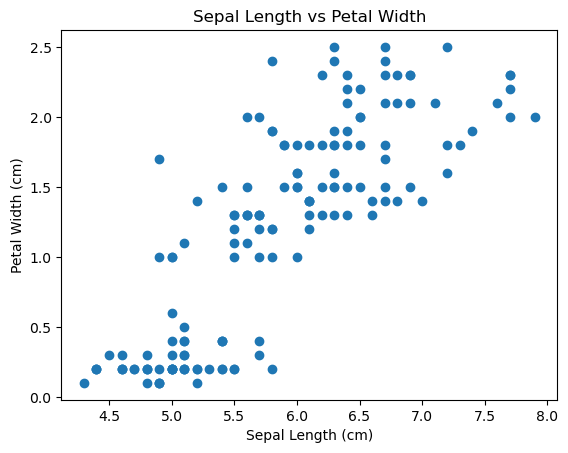

In [5]:
# Scatter plot of Sepal Length vs Petal Width
plt.scatter(iris_df['SepalLengthCm'], iris_df['PetalWidthCm'])
plt.title("Sepal Length vs Petal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


# Visualization - Pair Plot

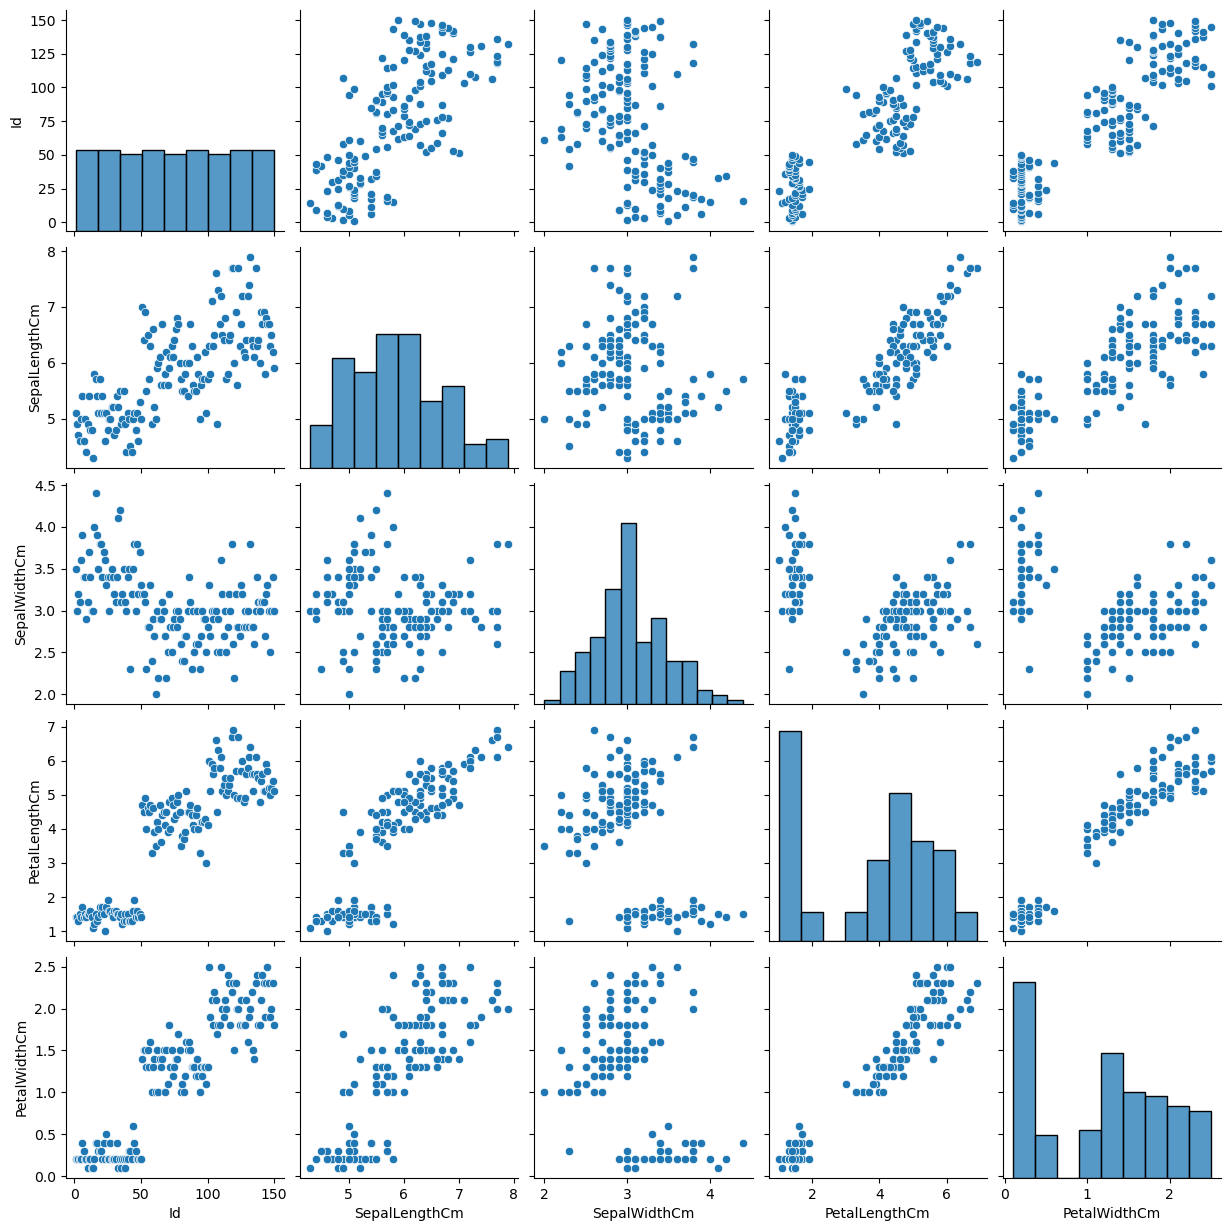

In [6]:
import seaborn as sns
# Pair plot
sns.pairplot(iris_df)
plt.show()

# K-Means Clustering

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


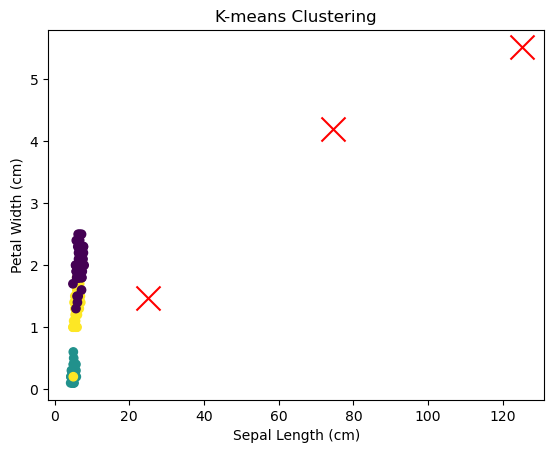

In [7]:
# K-means clustering
k = 3
np.random.seed(123)
kmeans_model = KMeans(n_clusters=k, random_state=123)
kmeans_model.fit(iris_df)

# Get the cluster assignments
Y = kmeans_model.labels_

# Plot K-means clusters
plt.scatter(iris_df['SepalLengthCm'], iris_df['PetalWidthCm'], c=Y, cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 3], s=300, c='red', marker='x')
plt.title("K-means Clustering")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


# Elbow Method - SSE vs Number of Clusters

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

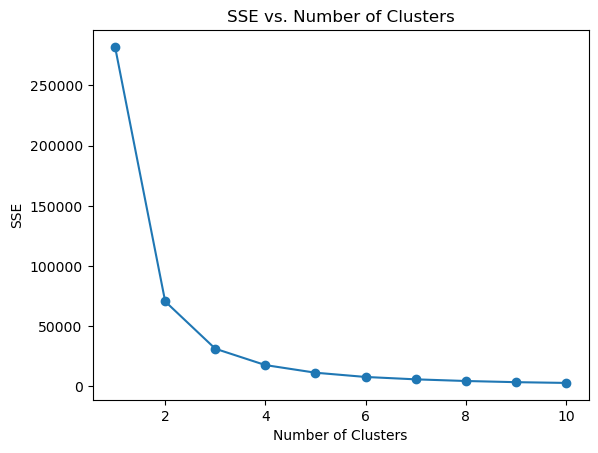

In [8]:
# Plot SSE for different k values
sse_values = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=123)
    kmeans_model.fit(iris_df)
    sse_values.append(kmeans_model.inertia_)

plt.plot(range(1, 11), sse_values, marker='o')
plt.title("SSE vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
